In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

from utils import sum_encoder_fit_transform

In [3]:
df = pd.read_csv('International_Education_Costs.csv')
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


# Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


(array([406.,  97.,  31.,  54.,  90.,  99.,  64.,  25.,  30.,  11.]),
 array([    0.,  6200., 12400., 18600., 24800., 31000., 37200., 43400.,
        49600., 55800., 62000.]),
 <BarContainer object of 10 artists>)

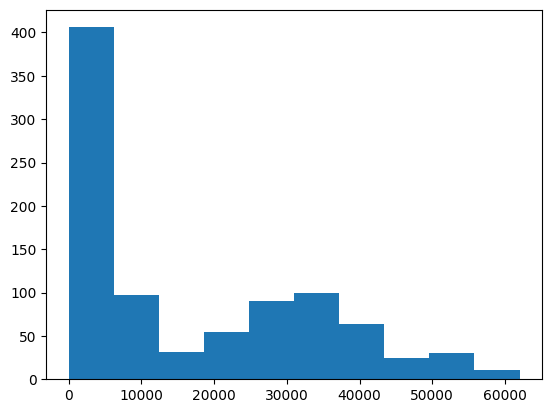

In [23]:
plt.hist(df['Tuition_USD'])

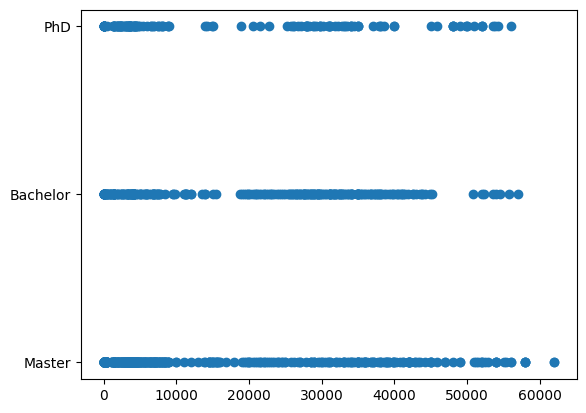

In [7]:
plt.scatter(df['Tuition_USD'], df['Level'])

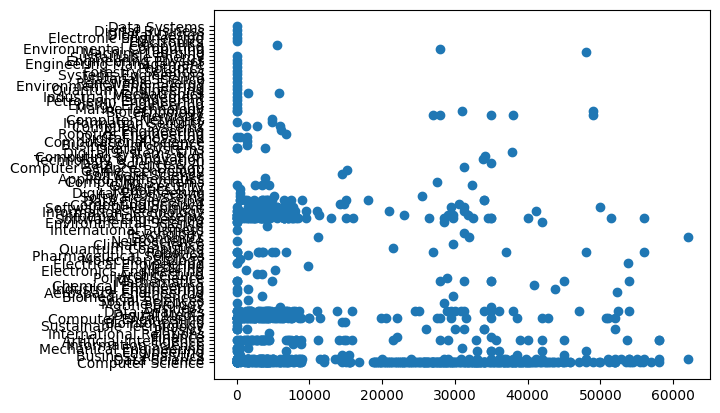

In [8]:
plt.scatter(df['Tuition_USD'], df['Program'])

In [11]:
df.corr(numeric_only=True)

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
Duration_Years,1.000000,0.140232,-0.068300,0.051565,0.017424,0.065670,0.020097
Tuition_USD,0.140232,1.000000,0.396830,0.724445,0.522490,0.582407,-0.116710
Living_Cost_Index,-0.068300,0.396830,1.000000,0.811128,0.256820,0.754393,-0.198685
Rent_USD,0.051565,0.724445,0.811128,1.000000,0.374079,0.776770,-0.193944
Visa_Fee_USD,0.017424,0.522490,0.256820,0.374079,1.000000,0.129655,-0.077886
Insurance_USD,0.065670,0.582407,0.754393,0.776770,0.129655,1.000000,-0.189426
Exchange_Rate,0.020097,-0.116710,-0.198685,-0.193944,-0.077886,-0.189426,1.000000


# Data preprocessing and model training

In [13]:
df2 = df[['Duration_Years', 'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']]

sep = int(0.8 * len(df2))

df2_train = df2.iloc[:sep]
df2_test = df2.iloc[sep:]

In [17]:
model = LinearRegression().fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LinearRegression:', mae(df2_test['Tuition_USD'], pred))

LinearRegression: 4078.7593641799003


In [20]:
model = Lasso(alpha=200).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

LassoRegression: 4059.996715158839


In [21]:
model = Ridge(alpha=200).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('RidgeRegression:', mae(df2_test['Tuition_USD'], pred))

RidgeRegression: 4065.168058231079


In [22]:
model = ElasticNet(alpha=200).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

LassoRegression: 5767.6035702336


# One Hot Coding

In [46]:
categorical_variables = ['Country', 'City', 'University', 'Program', 'Level']

df2 = df.copy()

for var in categorical_variables:
    one_hot = pd.get_dummies(df2[var])
    df2 = df2.drop(var, axis = 1)
    df2 = df2.join(one_hot, lsuffix='_left', rsuffix='_right')

In [47]:
sep = int(0.8 * len(df2))

df2_train = df2.iloc[:sep]
df2_test = df2.iloc[sep:]

model = LinearRegression().fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LinearRegression:', mae(df2_test['Tuition_USD'], pred))

model = Lasso(alpha=5).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

model = Ridge(alpha=5).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('RidgeRegression:', mae(df2_test['Tuition_USD'], pred))

model = ElasticNet(alpha=5).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

LinearRegression: 301774.99372127786
LassoRegression: 2577.622517908086
RidgeRegression: 2995.8958456734754
LassoRegression: 4055.6191830095518


# Ordinal encoding

In [ ]:
categorical_variables = ['Country', 'City', 'University', 'Program', 'Level']
df2 = df.copy()

enc = OrdinalEncoder()
enc.fit(df2[categorical_variables])
df2[categorical_variables] = enc.transform(df2[categorical_variables])

In [52]:
sep = int(0.8 * len(df2))

df2_train = df2.iloc[:sep]
df2_test = df2.iloc[sep:]

model = LinearRegression().fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LinearRegression:', mae(df2_test['Tuition_USD'], pred))

model = Lasso(alpha=200).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

model = Ridge(alpha=5).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('RidgeRegression:', mae(df2_test['Tuition_USD'], pred))

model = ElasticNet(alpha=5).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

LinearRegression: 4374.51674632943
LassoRegression: 4344.10815674187
RidgeRegression: 4373.883794736193
LassoRegression: 4295.524652217956


# Sum encoding

In [4]:
categorical_variables = ['Country', 'City', 'University', 'Program', 'Level']
df2 = df.copy()

df2 = sum_encoder_fit_transform(df=df2, cat_variables=categorical_variables, target_name="Tuition_USD")

In [5]:
sep = int(0.8 * len(df2))

df2_train = df2.iloc[:sep]
df2_test = df2.iloc[sep:]

model = LinearRegression().fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LinearRegression:', mae(df2_test['Tuition_USD'], pred))

model = Lasso(alpha=2000).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

model = Ridge(alpha=2000).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('RidgeRegression:', mae(df2_test['Tuition_USD'], pred))

model = ElasticNet(alpha=2000).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

LinearRegression: 636.6136794681584
LassoRegression: 398.65155730156835
RidgeRegression: 435.71415157037995
LassoRegression: 400.73546379938523


# Helmet encoding

In [ ]:
categorical_variables = ['Country', 'City', 'University', 'Program', 'Level']
df2 = df.copy()

encoder = ce.HelmertEncoder(cols=categorical_variables, drop_invariant=True)
dfh = encoder.fit_transform(df2[categorical_variables])
df2 = pd.concat([df2, dfh], axis=1)
df2 = df2.drop(categorical_variables, axis=1)

In [13]:
sep = int(0.8 * len(df2))

df2_train = df2.iloc[:sep]
df2_test = df2.iloc[sep:]

model = LinearRegression().fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LinearRegression:', mae(df2_test['Tuition_USD'], pred))

model = Lasso(alpha=20).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

model = Ridge(alpha=20).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('RidgeRegression:', mae(df2_test['Tuition_USD'], pred))

model = ElasticNet(alpha=20).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

LinearRegression: 291457.24547336705


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.421e+09, tolerance: 2.032e+07
  model = cd_fast.enet_coordinate_descent(


LassoRegression: 3956.578823417188
RidgeRegression: 10683.326852727447
LassoRegression: 5232.7506095051085


# Polynomial encoding

In [20]:
categorical_variables = ['Country', 'City', 'University', 'Program', 'Level']
df2 = df.copy()

encoder = ce.PolynomialEncoder(cols=categorical_variables, drop_invariant=True)
dfh = encoder.fit_transform(df2[categorical_variables])
df2 = pd.concat([df2, dfh], axis=1)
df2 = df2.drop(categorical_variables, axis=1)
df2 = df2.dropna(axis=1)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/patsy/contrasts.py:272: RuntimeWarning: overflow encountered in power
  raw_poly = scores.reshape((-1, 1)) ** np.arange(n).reshape((1, -1))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/patsy/contrasts.py:272: RuntimeWarning: overflow encountered in power
  raw_poly = scores.reshape((-1, 1)) ** np.arange(n).reshape((1, -1))


In [24]:
sep = int(0.8 * len(df2))

df2_train = df2.iloc[:sep]
df2_test = df2.iloc[sep:]

model = LinearRegression().fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LinearRegression:', mae(df2_test['Tuition_USD'], pred))

model = Lasso(alpha=200).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

model = Ridge(alpha=200).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('RidgeRegression:', mae(df2_test['Tuition_USD'], pred))

model = ElasticNet(alpha=200).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

LinearRegression: 135612.26130895063
LassoRegression: 4371.357180883756
RidgeRegression: 4039.3588874826687
LassoRegression: 5767.455871761096


# Backward Difference encoding

In [25]:
categorical_variables = ['Country', 'City', 'University', 'Program', 'Level']
df2 = df.copy()

encoder = ce.BackwardDifferenceEncoder(cols=categorical_variables, drop_invariant=True)
dfh = encoder.fit_transform(df2[categorical_variables])
df2 = pd.concat([df2, dfh], axis=1)
df2 = df2.drop(categorical_variables, axis=1)

In [29]:
sep = int(0.8 * len(df2))

df2_train = df2.iloc[:sep]
df2_test = df2.iloc[sep:]

model = LinearRegression().fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LinearRegression:', mae(df2_test['Tuition_USD'], pred))

model = Lasso(alpha=2000).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

model = Ridge(alpha=2000).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('RidgeRegression:', mae(df2_test['Tuition_USD'], pred))

model = ElasticNet(alpha=200).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

LinearRegression: 10507.410318467419
LassoRegression: 4057.6665444298474
RidgeRegression: 4031.6270873765807
LassoRegression: 5769.697173135286


# Binary encoding

In [27]:
categorical_variables = ['Country', 'City', 'University', 'Program', 'Level']
df2 = df.copy()

encoder = ce.BinaryEncoder(cols=categorical_variables, drop_invariant=True)
dfh = encoder.fit_transform(df2[categorical_variables])
df2 = pd.concat([df2, dfh], axis=1)
df2 = df2.drop(categorical_variables, axis=1)

In [28]:
sep = int(0.8 * len(df2))

df2_train = df2.iloc[:sep]
df2_test = df2.iloc[sep:]

model = LinearRegression().fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LinearRegression:', mae(df2_test['Tuition_USD'], pred))

model = Lasso(alpha=200).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

model = Ridge(alpha=200).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('RidgeRegression:', mae(df2_test['Tuition_USD'], pred))

model = ElasticNet(alpha=200).fit(df2_train.drop('Tuition_USD', axis=1), df2_train['Tuition_USD'])
pred = model.predict(df2_test.drop('Tuition_USD', axis=1))
print('LassoRegression:', mae(df2_test['Tuition_USD'], pred))

LinearRegression: 10507.410318467419
LassoRegression: 5618.856176919678
RidgeRegression: 4570.435318288917
LassoRegression: 5769.697173135286
